In [1]:
# -*- coding: utf-8 -*-
"""
Created on Mon Sep 13 20:00:20 2021

@author: Ashok Kumar S
"""

'\nCreated on Mon Sep 13 20:00:20 2021\n\n@author: Ashok Kumar S\n'

# Logging

In [2]:
import logging
from logger_app import logs

# Importing Libraries

In [3]:
try:
    logging.info("Importing Required Dependencies")
    import pandas as pd
    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.naive_bayes import MultinomialNB
    from sklearn.linear_model import LogisticRegression
    from sklearn.ensemble import AdaBoostClassifier
    from sklearn.ensemble import ExtraTreesClassifier
    from sklearn.ensemble import GradientBoostingClassifier
    from sklearn.svm import LinearSVC
    from sklearn.svm import SVC
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.tree import ExtraTreeClassifier
    from xgboost import XGBClassifier
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np
    import mysql.connector
    import pickle
    from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
except Exception as e:
    print(e)
    logging.exception(e)

# Reading the data from MySQL Database
## Connecting a Database

In [4]:
class database:
    
    def __init__(self):
        pass
    
    def connect_database():
    
        try:
            logging.info("Connecting a Database")
            mydb = mysql.connector.connect(
                    host = "localhost",
                    user = "root",
                    passwd = "********",# Give your database password
                    database = "spam_ham")
            return mydb
        except Exception as e:
            print(e)
            logging.exception(e)
            
        
mydb = database.connect_database()

# Read the data

In [5]:
class readdata:
    
    def __init__(self, db):
        self.db = db
        
    def read_df(self):
    
        try:
            logging.info("Reading the Data from MySQL")
            df = pd.read_sql("SELECT * FROM data", con=self.db)
            return df
        except Exception as e:
            print(e)
            logging.exception(e)

obj = readdata(mydb)
df = obj.read_df()

# Exploratory Data Analysis

In [6]:
try:
    logging.info("Exploratory Data Analysis")
    info = df.info()

    null = df.isnull().sum()

    print(info)
    print(null)
except Exception as e:
    print(e)
    logging.exception(e)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6606 entries, 0 to 6605
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Label    6606 non-null   object
 1   Message  6606 non-null   object
dtypes: object(2)
memory usage: 103.3+ KB
None
Label      0
Message    0
dtype: int64


# Replacing a value ham as 0 and spam as 1

In [7]:
class value:
    
    def __init__(self):
        pass
    
    def replace_val():
    
        try:
            logging.info("Replacing a value with ham as 0 and spam as 1")
            df.replace({"ham":0, "spam":1}, inplace=True)
            return df
        except Exception as e:
            print(e)
            logging.exception(e)

df = value.replace_val() 

# Plotting histogram of Label

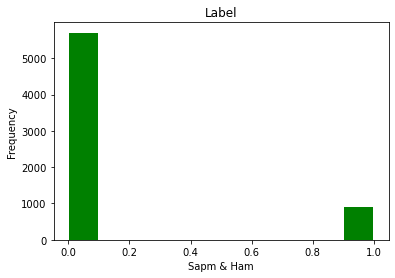

In [8]:
class plot:
    def __init__(self):
        pass
    
    def hist_plot():
        try:
            logging.info("Plotting histogram")
            plt.hist(df['Label'],rwidth=0.95, color='g')
            plt.xlabel("Sapm & Ham")
            plt.ylabel("Frequency")
            plt.title("Label")
            plt.show()
        except Exception as e:
            print(e)
            logging.exception(e)
        
plot.hist_plot()

# Independent and Dependent variables

In [9]:
class variables:
    
    def __init__(self):
        pass
    
    def ind_dep():
    
        try:
            logging.info("Independent and Dependent variables")
            X = df['Message']
            Y = df['Label']
            return X, Y
        except Exception as e:
            print(e)
            logging.exception(e)

X, Y = variables.ind_dep()

# Extract Feature With CountVectorizer

In [10]:
class feature:
    
    def __init__(self, X):
        self.X = X
        
    def count_vector(self):
    
        try:
            logging.info("Extract Feature With CountVectorizer")
            cv = CountVectorizer()
            X = cv.fit_transform(self.X)
            return X, cv
        except Exception as e:
            print(e)
            logging.exception(e)
        
obj = feature(X)  
X, cv = obj.count_vector()

print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# Dumping Extracted features to pickle file

In [11]:
class file:
    
    def __init__(self):
        pass
    
    def dump():
        try:
            logging.info("Dumping Extracted features to pickle file")
            pickle.dump(cv, open(r'C:\Users\prash\Desktop\data\SMS_Spam_Ham_Classification\transform.pkl','wb'))
        except Exception as e:
            print(e)
            logging.exception(e)

file.dump()

# Splitting the data into Train and Test

In [12]:
from sklearn.model_selection import train_test_split

class traintest:
    
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y
        
    def data_split(self):
        try:
            logging.info("Splitting the data into Train and Test")
            X_train, X_test, Y_train, Y_test = train_test_split(self.X, self.Y, test_size=0.20, random_state=0)
            return  X_train, X_test, Y_train, Y_test
        except Exception as e:
            print(e)
            logging.exception(e)
    
obj = traintest(X, Y)
X_train, X_test, Y_train, Y_test = obj.data_split()

In [13]:
print(X_train.toarray())
print(Y_train)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
2584    0
5530    0
1526    0
3784    0
4357    0
       ..
4931    1
3264    0
1653    0
2607    0
2732    0
Name: Label, Length: 5284, dtype: int64


# Model Building

In [14]:
class model:
    
    def __init__(self, X_train, X_test, Y_train, Y_test):
        self.X_train = X_train
        self.X_test = X_test
        self.Y_train = Y_train
        self.Y_test = Y_test
        
    def naive_bayes(self):
        try:
            logging.info("Fitting the Model Using MultinomialNB")
            ## Fitting the Model Using MultinomialNB
            NB = MultinomialNB()
            NB.fit(self.X_train, self.Y_train)
            YNB_pred = NB.predict(self.X_test)
            print("MultinomialNB")
            print(NB.score(self.X_test, self.Y_test))
            print(confusion_matrix(self.Y_test, YNB_pred))
            print(accuracy_score(self.Y_test, YNB_pred))
            print(classification_report(self.Y_test, YNB_pred))
            return YNB_pred, NB
        except Exception as e:
            print(e)
            logging.exception(e)
    
    def logistic_regression(self):
        try:
            logging.info("Fitting the Model Using LogisticRegression")
            ## Fitting the Model Using LogisticRegression
            LR = LogisticRegression()
            LR.fit(self.X_train, self.Y_train)
            YLR_pred = LR.predict(self.X_test)
            print("LogisticRegression")
            print(LR.score(self.X_test, self.Y_test))
            print(confusion_matrix(self.Y_test, YLR_pred))
            print(accuracy_score(self.Y_test, YLR_pred))
            print(classification_report(self.Y_test, YLR_pred))
            return YLR_pred, LR
        except Exception as e:
            print(e)
            logging.exception(e)
    
    def ada_boost(self):
        try:
            logging.info("Fitting the Model Using AdaBoostClassifier")
            ## Fitting the Model Using AdaBoostClassifier
            ABC = AdaBoostClassifier()
            ABC.fit(self.X_train, self.Y_train)
            YABC_pred = ABC.predict(self.X_test)
            print("AdaBoostClassifier")
            print(ABC.score(self.X_test, self.Y_test))
            print(confusion_matrix(self.Y_test, YABC_pred))
            print(accuracy_score(self.Y_test, YABC_pred))
            print(classification_report(self.Y_test, YABC_pred))
            return YABC_pred, ABC
        except Exception as e:
            print(e)
            logging.exception(e)
    
    def extra_tree(self):
        try:
            logging.info("Fitting the Model Using ExtraTreesClassifier")
            ## Fitting the Model Using ExtraTreesClassifier
            ETC = ExtraTreesClassifier()
            ETC.fit(self.X_train, self.Y_train)
            YETC_pred = ETC.predict(self.X_test)
            print("ExtraTreesClassifier")
            print(ETC.score(self.X_test, self.Y_test))
            print(confusion_matrix(self.Y_test, YETC_pred))
            print(accuracy_score(self.Y_test, YETC_pred))
            print(classification_report(self.Y_test, YETC_pred))
            return YETC_pred, ETC
        except Exception as e:
            print(e)
            logging.exception(e)
    
    def gradient_boost(self):
        try:
            logging.info("Fitting the Model Using GradientBoostingClassifier")
            ## Fitting the Model Using GradientBoostingClassifier
            GBC = GradientBoostingClassifier()
            GBC.fit(self.X_train, self.Y_train)
            YGBC_pred = GBC.predict(self.X_test)
            print("GradientBoostingClassifier")
            print(GBC.score(self.X_test, self.Y_test))
            print(confusion_matrix(self.Y_test, YGBC_pred))
            print(accuracy_score(self.Y_test, YGBC_pred))
            print(classification_report(self.Y_test, YGBC_pred))
            return YGBC_pred, GBC
        except Exception as e:
            print(e)
            logging.exception(e)
    
    def xgboost(self):
        try:
            logging.info("Fitting the Model Using XGBClassifier")
            ## Fitting the Model Using XGBClassifier
            xgb = XGBClassifier()
            xgb.fit(self.X_train, self.Y_train)
            Yxgb_pred = xgb.predict(self.X_test)
            print("XGBClassifier")
            print(xgb.score(self.X_test, self.Y_test))
            print(confusion_matrix(self.Y_test, Yxgb_pred))
            print(accuracy_score(self.Y_test, Yxgb_pred))
            print(classification_report(self.Y_test, Yxgb_pred))
            return Yxgb_pred, xgb
        except Exception as e:
            print(e)
            logging.exception(e)
    
        
obj = model(X_train, X_test, Y_train, Y_test)
YNB_pred, NB = obj.naive_bayes()
YLR_pred, LR = obj.logistic_regression()
YABC_pred, ABC = obj.ada_boost()
YETC_pred, ETC = obj.extra_tree()
YGBC_pred, GBC = obj.gradient_boost()
Yxgb_pred, xgb = obj.xgboost()

MultinomialNB
0.981089258698941
[[1127   13]
 [  12  170]]
0.981089258698941
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1140
           1       0.93      0.93      0.93       182

    accuracy                           0.98      1322
   macro avg       0.96      0.96      0.96      1322
weighted avg       0.98      0.98      0.98      1322

LogisticRegression
0.9871406959152799
[[1140    0]
 [  17  165]]
0.9871406959152799
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1140
           1       1.00      0.91      0.95       182

    accuracy                           0.99      1322
   macro avg       0.99      0.95      0.97      1322
weighted avg       0.99      0.99      0.99      1322

AdaBoostClassifier
0.972768532526475
[[1132    8]
 [  28  154]]
0.972768532526475
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     

C:\Users\prash\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:06:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier
0.9841149773071104
[[1136    4]
 [  17  165]]
0.9841149773071104
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1140
           1       0.98      0.91      0.94       182

    accuracy                           0.98      1322
   macro avg       0.98      0.95      0.97      1322
weighted avg       0.98      0.98      0.98      1322



# Dumping the Model to pickle file

In [15]:
class pkl:
    
    def __init__(self):
        pass
    
    def spam_ham():
        try:
            logging.info("Dumping the Model to pickle file")
            pickle.dump(LR, open(r'C:\Users\prash\Desktop\data\SMS_Spam_Ham_Classification\Logistic_Regression.pkl','wb'))
            pickle.dump(NB, open(r'C:\Users\prash\Desktop\data\SMS_Spam_Ham_Classification\Naive_Bayes.pkl','wb'))
            pickle.dump(ABC, open(r'C:\Users\prash\Desktop\data\SMS_Spam_Ham_Classification\Adaboost_classifier.pkl','wb'))
            pickle.dump(ETC, open(r'C:\Users\prash\Desktop\data\SMS_Spam_Ham_Classification\Extratrees_classifier.pkl','wb'))
            pickle.dump(GBC, open(r'C:\Users\prash\Desktop\data\SMS_Spam_Ham_Classification\Gradientboost_classifier.pkl','wb'))
            pickle.dump(xgb, open(r'C:\Users\prash\Desktop\data\SMS_Spam_Ham_Classification\XGBoost_classifier.pkl','wb'))
        except Exception as e:
            print(e)
            logging.exception(e)

pkl.spam_ham()

# Prediction

In [16]:
class pred:
    
    def __init__(self, data):
        self.data = data
        
    def prediction(self):
        try:
            logging.info("Prediction on user data")
            data = cv.transform(self.data)
            y_pred = LR.predict(data)
            print(y_pred)
            if y_pred == 0:
                print("Prediction is Ham")
            else:
                print("Prediction is Spam")
        except Exception as e:
            print(e)
            logging.exception(e)
            
data = [" +123 Congratulations - in this week's competition draw u have won the £1450 prize to claim just call 09050002311 b4280703. T&Cs/stop SMS 08718727868. Over 18 only 150ppm "]
obj = pred(data)
obj.prediction()

[1]
Prediction is Spam


# Loading Pickle file and Prediction

In [17]:
class load_model:
    
    def __init__(self, data):
        self.data = data
        
    def pred(self):
        try:
            logging.info("Loading pickle file and Prediction")
            model = pickle.load(open(r'C:\Users\prash\Desktop\data\SMS_Spam_Ham_Classification\Extratrees_classifier.pkl','rb'))
            cv = pickle.load(open(r'C:\Users\prash\Desktop\data\SMS_Spam_Ham_Classification\transform.pkl','rb'))
            data = cv.transform(self.data)
            y_pred = LR.predict(data)
            print(y_pred)
            if y_pred == 0:
                print("Prediction is Ham")
            else:
                print("Prediction is Spam")
        except Exception as e:
            print(e)
            logging.exception(e)
            
data = ["&lt;#&gt;  am I think? Should say on syllabus"]
obj = load_model(data)
obj.pred()

[0]
Prediction is Ham
